<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 4'</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacio de estados (4/4) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

Veremos el algoritmo A$^*$, el cual es una forma de Best First Search. En este caso, la evaluación $f$ de los nodos se hace mediante la suma entre su costo_camino $g$ y una heurística $h$ que estima el costo mínimo desde el nodo hasta la solución.

$$f(n) = g(n) + h(n)$$

Adaptado de (Russell & Norvig, 2020), sección 3.6

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Algoritmo A$^*$](#a_star).
* [Comparación de heurísticas con A$^*$](#compara).


## Algoritmo A$^*$ <a class="anchor" id="a_star"></a>

([Volver al inicio](#inicio))

El siguiente es el pseudocódigo del algoritmo A$^*$:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> A_star(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">f</font>, <font style="font-style: italic;">g</font>) <font style="font-weight: bold;" color = "red">returns</font> <font style="font-style: italic;">nodo</font> o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">problema</font>.costo &#8592; <font style="font-style: italic;">g</font> <br>
&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp; <font style="font-style: italic;">cod</font> &#8592; <font style="font-style: italic;">problema</font>.codigo(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">v</font> &#8592; <font style="font-style: italic;">f</font>(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista prioritaria con 1 item con key <font style="font-style: italic;">nodo</font> y valor v<br>
&nbsp;&nbsp; <font style="font-style: italic;">explorados</font> &#8592; diccionario con 1 item con key <font style="font-style: italic;">cod</font> y valor v <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">hijo</font> <font style="font-weight: bold;" color = "red">in</font> EXPAND(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">hijo</font>.estado<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">cod</font> &#8592; <font style="font-style: italic;">problema</font>.codigo(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">c</font> &#8592; <font style="font-style: italic;">hijo</font>.costo_camino + <font style="font-style: italic;">f</font>(<font style="font-style: italic;">s</font>)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">cod</font> <font style="font-weight: bold;" color = "red">not in</font> <font style="font-style: italic;">explorados</font>.keys <font style="font-weight: bold;" color = "red">or</font> <font style="font-style: italic;">c</font> &#60; <font style="font-style: italic;">explorados</font>[<font style="font-style: italic;">cod</font>] <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font>[<font style="font-style: italic;">hijo</font>] &#8592; <font style="font-style: italic;">c</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">explorados</font>[<font style="font-style: italic;">cod</font>] &#8592; <font style="font-style: italic;">c</font> <br>
    &nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

La siguiente es la implementación en Python de A$^*$:

In [122]:
from types import MethodType

def A_star(problema, f, g=None):
    if g != None:
        problema.costo = MethodType(g, problema)
    s = problema.estado_inicial
    cod = problema.codigo(s)
    nodo = Nodo(s, None, None, 0, cod)
    v = f(s)
    frontera = ListaPrioritaria()
    frontera.push(nodo, v)
    explorados = {}
    explorados[cod] = v
    while not frontera.is_empty():
        nodo = frontera.pop()
        if problema.test_objetivo(nodo.estado):
            return nodo
        for hijo in expand(problema, nodo):
            s = hijo.estado
            cod = problema.codigo(s)
            c = hijo.costo_camino + f(s)
            if (cod not in explorados.keys()) or (c < explorados[cod]):
                frontera.push(hijo, c)
                explorados[cod] = c
    return None

Vamos a usar el algoritmo A$^*$ para resolver el problema del viaje a Rumania:

<img src="./imagenes/Rumania.png" width="400"/>

In [124]:
from ambientes import ViajeRumania

viaje = ViajeRumania('Arad', 'Bucharest')

Observe que el ambiente de tarea incorpora las coordenadas de cada ciudad:

In [125]:
viaje.coordenadas

{'Oradea': (-378.39823252974577, 343.17197064259227),
 'Zerind': (-410.21550133104574, 288.6280812689352),
 'Arad': (-435.21478396063856, 232.9478608666603),
 'Timisoara': (-432.94212190340284, 114.76943389040338),
 'Lugoj': (-332.9449913850316, 69.31619274568916),
 'Mehadia': (-326.1270052133244, 14.772303372032118),
 'Drobeta': (-332.9449913850316, -42.04424805886064),
 'Sibiu': (-272.7194468682852, 182.94929560747468),
 'Rimnicu Vilcea': (-236.3568539525139, 115.90576491902122),
 'Craiova': (-217.03922646601035, -55.680220402274905),
 'Fagaras': (-130.67806829105334, 168.17699223544255),
 'Pitesti': (-109.0877787473141, 53.40755834503919),
 'Bucharest': (0.0, 0.0),
 'Giurgiu': (-37.49892394438922, -81.81583406048557),
 'Urziceni': (79.54317200324986, 29.544606744064236),
 'Vaslui': (152.2683578347926, 163.63166812097114),
 'Iasi': (103.40612360422482, 249.99282629592813),
 'Neamt': (7.9543172003249865, 294.3097364120245),
 'Hirsova': (188.63095075056395, 30.68093777268209),
 'Eforie

Ya que estas coordenadas no determinan exactamente las distancias en la figura, definimos la función de costo usando la distancia euclidiana entre las coordenadas:

In [127]:
def costo(self, estado, accion):
    return self.distancia(estado, accion)

Comprobamos el funcionamiento del algoritmo:

In [128]:
l = A_star(viaje, f=viaje.distancia_objetivo, g=costo)
if l is not None:
    camino = [viaje.estado_inicial] + solucion(l)
    print("La solución encontrada es: ", camino)
    print("La cantidad de kilómetros es:", l.costo_camino)
else:
    print("No hay solución!")

La solución encontrada es:  ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
La cantidad de kilómetros es: 509.52976842414216


---

Vamos a hacer ahora la comparación de tiempos de CPU de los tres algoritmos:

* Costo uniforme (Dijkstra)
* Avara con distancia euclidiana
* A$^*$

Observe que estamos generando distintos problemas, comenzando desde una ciudad aleatoria hasta otra ciudad aleatoria. Esto para tratar de garantizar un tratamiento más justo a todos los algoritmos:

                  sum_sq     df          F        PR(>F)
C(Función)  2.740321e-07    2.0  52.164637  1.320172e-21
Residual    1.568085e-06  597.0        NaN           NaN


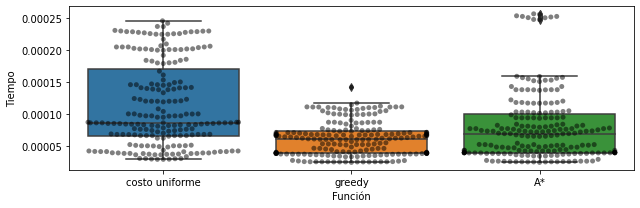

In [19]:
from ambientes import ViajeRumania
from busqueda import *
from tiempos import *
from random import sample
import warnings
warnings.filterwarnings('ignore')

funs = [
    lambda x: best_first_search(x, costo),
    lambda x: greedy_search(x, x.distancia_objetivo),
    lambda x: A_star(x, costo, x.distancia_objetivo),
]
nombres = [
    'costo uniforme', 
    'greedy',
    'A*',
]
viaje = ViajeRumania('Arad', 'Bucharest')
ciudades = viaje.rutas.keys()
parejas = [sample(ciudades, 2) for _ in range(20)]
args = [ViajeRumania(*p) for p in parejas]
data = compara_funciones_sobreargumentos(funs=funs, args=args, nombres=nombres)
# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);
# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

La prueba F nos dice que los tres algoritmos tienen tiempo promedio de CPU distinto. En la figura podemos ver que el algoritmo más rápido es el avaro. No obstante, ya sabemos que este no nos da una solución óptima. El segundo algoritmo más rápido es el A$^*$, el cual sí encuentra la solución óptima. Por esta razón, para este tipo de problemas, se prefiere el algoritmo A$^*$.

---

EJERCICIO PARA DESARROLLAR EN CLASE: ANÁLISIS DE TIEMPOS PARA TAMAÑOS DISTINTOS DEL PROBLEMA DEL PUZZLE.

---

## En este notebook usted aprendió

* Cómo realizar una búsqueda mediante el método A$^*$.
* Comparar los tiempos de los algoritmos.


---